In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_path=('asl-alphabet/asl_alphabet_train/asl_alphabet_train')
test_path=('asl-alphabet/asl_alphabet_test/asl_alphabet_test')

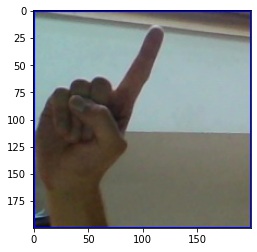

In [4]:
from matplotlib.image import imread
plt.imshow(imread('asl-alphabet/asl_alphabet_train/asl_alphabet_train/Z/Z1.jpg'))

In [5]:
image_dat='asl-alphabet/asl_alphabet_train/asl_alphabet_train/Z/Z1.jpg'
imsh=imread(image_dat).shape
imsh1=imsh
imsh

(200, 200, 3)

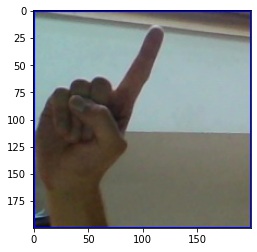

In [6]:
plt.imshow(imread(image_dat))

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_gen=ImageDataGenerator(rescale=1./255,validation_split=0.20)
img_gen

In [8]:
imsh1=(64,64,3)

In [9]:
batch_size=32
train_imgen=img_gen.flow_from_directory(train_path,
                                        target_size=imsh1[:2],
                                        color_mode='rgb',
                                        batch_size=batch_size,
                                        class_mode='categorical',
                                        subset='training',
                                        shuffle=True
                                       )


Found 69600 images belonging to 29 classes.


In [10]:
validation_generator = img_gen.flow_from_directory(
    train_path, 
    target_size=imsh1[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
    )

Found 17400 images belonging to 29 classes.


In [11]:
train_imgen.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

In [13]:
model=Sequential()

model.add(Conv2D(filters=16,kernel_size=4,input_shape=imsh1,activation='relu'))
model.add(MaxPool2D(pool_size=2))
          
model.add(Conv2D(filters=32,kernel_size=4,activation='relu'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=4,activation='relu'))
model.add(MaxPool2D(pool_size=2))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(29,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 61, 61, 16)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        32832     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0

In [15]:
results=model.fit(x=train_imgen,
                  epochs=10,
                  verbose=2,
                  validation_data=validation_generator)

Epoch 1/10
2175/2175 - 959s - loss: 0.7379 - accuracy: 0.7779 - val_loss: 1.4411 - val_accuracy: 0.6467 - 959s/epoch - 441ms/step
Epoch 2/10
2175/2175 - 429s - loss: 0.0944 - accuracy: 0.9698 - val_loss: 1.8023 - val_accuracy: 0.6522 - 429s/epoch - 197ms/step
Epoch 3/10
2175/2175 - 433s - loss: 0.0512 - accuracy: 0.9850 - val_loss: 1.6631 - val_accuracy: 0.6963 - 433s/epoch - 199ms/step
Epoch 4/10
2175/2175 - 438s - loss: 0.0358 - accuracy: 0.9898 - val_loss: 2.2510 - val_accuracy: 0.6818 - 438s/epoch - 201ms/step
Epoch 5/10
2175/2175 - 433s - loss: 0.0340 - accuracy: 0.9899 - val_loss: 2.0485 - val_accuracy: 0.7121 - 433s/epoch - 199ms/step
Epoch 6/10
2175/2175 - 425s - loss: 0.0256 - accuracy: 0.9928 - val_loss: 1.7454 - val_accuracy: 0.7246 - 425s/epoch - 195ms/step
Epoch 7/10
2175/2175 - 398s - loss: 0.0244 - accuracy: 0.9933 - val_loss: 2.1119 - val_accuracy: 0.7244 - 398s/epoch - 183ms/step
Epoch 8/10
2175/2175 - 421s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 2.1585 - val_acc

<AxesSubplot:>

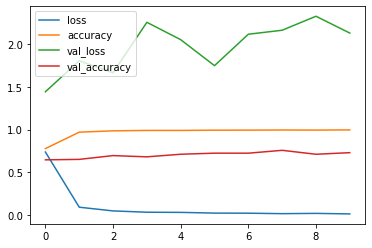

In [16]:
d1=pd.DataFrame(results.history)
d1.plot()

In [18]:
model.save_weights('ipmodel_weights')
model.save('ipmodel',save_format=tf)

INFO:tensorflow:Assets written to: ipmodel\assets


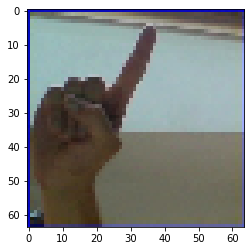

In [21]:
from tensorflow.keras.preprocessing import image
img=[]
pr_img=[]
for i in os.listdir(test_path):
    myi=image.load_img("/".join([test_path,i]),target_size=imsh1)
    img.append(myi)
    plt.imshow(myi)

for i in img:
    myi1=np.expand_dims(i,axis=0)
    pr_img.append(myi1)
    

In [20]:
pred=[]
d={}
s="ABCDEFGHIJKLMNOPQRSTUVWXYZ@#"
for i,j in train_imgen.class_indices.items():
    d[j]=i

# print(d)    

for i in pr_img:
    a=np.argmax(model.predict(i), axis=-1)
    pred.append(d[a[0]])

# print(pred)

for i in range(len(pred)):
    print(pred[i],"  <----  ",s[i])

A   <----   A
B   <----   B
C   <----   C
D   <----   D
E   <----   E
F   <----   F
G   <----   G
H   <----   H
I   <----   I
J   <----   J
K   <----   K
L   <----   L
M   <----   M
nothing   <----   N
N   <----   O
O   <----   P
P   <----   Q
Q   <----   R
R   <----   S
space   <----   T
S   <----   U
T   <----   V
U   <----   W
V   <----   X
W   <----   Y
X   <----   Z
Y   <----   @
Z   <----   #
